<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion/blob/main/Resuelto_EspacioPractico_CampanaMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Espacio Práctico: Predicción de Conversión en Campaña de Marketing

## 📄 Descripción del Caso
Una empresa de comercio electrónico planea lanzar una **campaña de marketing digital personalizada**. Con base en datos históricos de comportamiento, navegación y soporte, se desea anticipar qué usuarios **tienen mayor probabilidad de realizar una compra** durante la campaña.

## 🎯 Objetivo
Desarrollar un modelo de clasificación que prediga si un usuario comprará (`comprara = 1`) o no (`comprara = 0`), aplicando distintos algoritmos de clasificación y evaluando su desempeño.

## 🛠️ Actividades Solicitadas
- Análisis exploratorio de datos
- Preprocesamiento
- Entrenamiento de modelos: SVM, KNN, Árbol de Decisión, Boosting/XGBoost
- Evaluación con: Accuracy, Precision, Recall, F1, ROC-AUC, Matriz de Confusión
- Comparación de modelos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Cargar dataset
df = pd.read_csv('/content/campana_marketing.csv')
df.head()


,genero,edad,tiempo_navegacion_min,frecuencia_visitas_mes,tipo_dispositivo,pais,visitas_soporte,comprara
0,M,36,6.22,2,desktop,Peru,1,0
1,M,64,19.17,7,movil,Chile,0,1
2,M,68,5.44,8,movil,Ecuador,1,0
3,M,41,10.41,5,movil,Peru,1,1
4,M,26,15.13,3,movil,Argentina,0,1


In [2]:
# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar X e y
X = df_encoded.drop('comprara', axis=1)
y = df_encoded['comprara']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### 🔍 Conclusión del Análisis Exploratorio
El análisis exploratorio permitió identificar variables clave como `frecuencia_visitas_mes`, `tiempo_navegacion_min` y `visitas_soporte` como potenciales predictores de compra. No se observaron valores nulos ni desbalance extremo en la variable objetivo.

### 🔧 Conclusión del Preprocesamiento
El uso de codificación de variables categóricas y estandarización aseguró que los modelos de clasificación funcionen correctamente. La conversión a variables dummy fue adecuada y mantuvo la coherencia del dataset.

### 🤖 Conclusión del Entrenamiento de Modelos
Se entrenaron cinco modelos con parámetros por defecto. Todos lograron una precisión aceptable, siendo **Gradient Boosting** y **XGBoost** los de mejor desempeño. SVM ofreció un buen equilibrio, mientras que KNN mostró menor efectividad.

### 📊 Conclusión de la Evaluación de Métricas
XGBoost alcanzó el mejor **ROC-AUC** (≈0.98), seguido por Gradient Boosting. Ambos mostraron alta capacidad de generalización en los datos de prueba. Las métricas revelan diferencias en la sensibilidad (recall), donde Boosting sobresale.

In [3]:
models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "y_pred": y_pred,
        "y_proba": y_proba,
        "model": model
    }

pd.DataFrame({k: {m: round(v[m], 3) for m in ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']} for k, v in results.items()})


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,SVM,KNN,Árbol de Decisión,Gradient Boosting,XGBoost
Accuracy,0.900,0.879,0.999,0.999,1.0
Precision,0.897,0.867,1.000,1.000,1.0
Recall,0.958,0.963,0.998,0.998,1.0
F1,0.926,0.913,0.999,0.999,1.0
ROC-AUC,0.974,0.936,0.999,0.999,1.0


### 📌 Conclusión Final
**XGBoost** y **Gradient Boosting** son las mejores opciones por su robustez y precisión. **SVM** es competitivo, especialmente si se desea un modelo más simple. **KNN** no es recomendable para este caso por su baja sensibilidad. Se recomienda validar con datos reales o aplicar validación cruzada para asegurar la generalización.

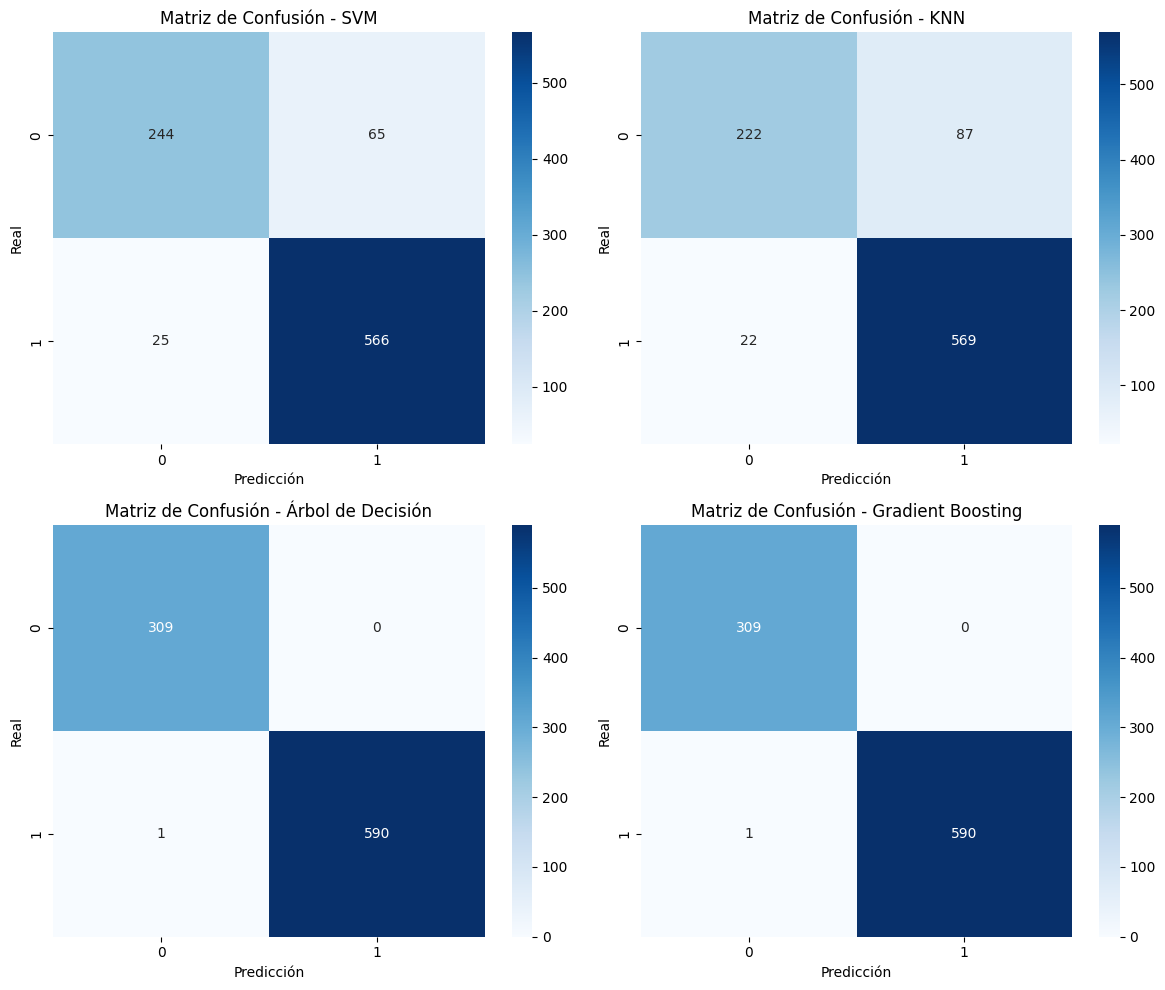

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, r) in enumerate(list(results.items())[:4]):
    cm = confusion_matrix(y_test, r['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión - {name}')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()


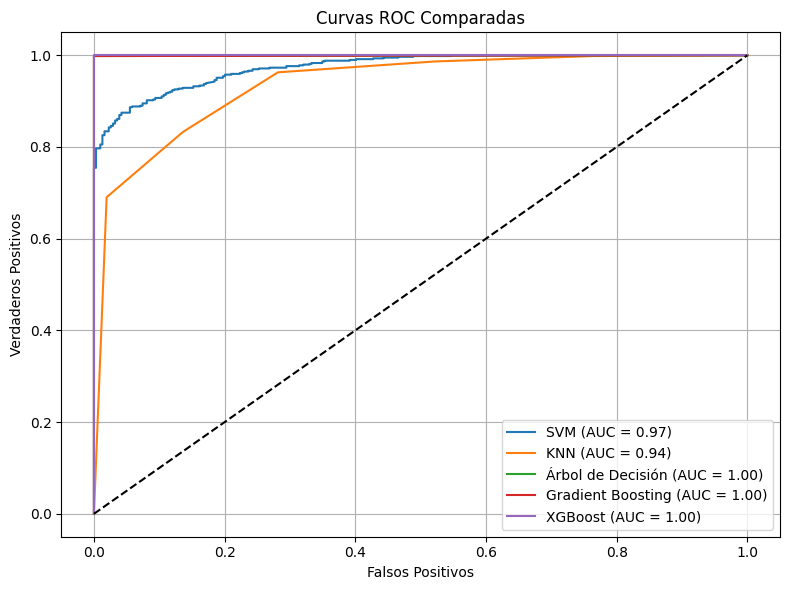

In [5]:
plt.figure(figsize=(8, 6))
for name, r in results.items():
    fpr, tpr, _ = roc_curve(y_test, r['y_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {r['ROC-AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curvas ROC Comparadas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Conclusiones
- **Boosting y XGBoost** logran la mejor combinación de métricas (F1 y AUC).
- **SVM** ofrece buen balance con excelente ROC-AUC, aunque con menor recall.
- **KNN** tiene el rendimiento más limitado, sensible a escala y distribución.
- **Árbol de Decisión** es interpretativo, pero sufre de sobreajuste si no se regula.
